In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('C:/Users/Michael Roy/Documents/Springboard/pycon-pandas-tutorial-master/style-table.css').read() + open('C:/Users/Michael Roy/Documents\Springboard/pycon-pandas-tutorial-master/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('C:/Users/Michael Roy/Documents/Springboard/pycon-pandas-tutorial-master/data/titles.csv', index_col=None)
titles.head()

,title,year
0,Al-suq al-Soda',1945
1,The Invisible Player,2015
2,The Axe Murders of Villisca,2016
3,The Crow Scarer,2014
4,Ves mir v glazakh tvoikh,1979


In [4]:
cast = pd.DataFrame.from_csv('C:/Users/Michael Roy/Documents/Springboard/pycon-pandas-tutorial-master/data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [17]:
release = pd.DataFrame.from_csv('C:/Users/Michael Roy/Documents/Springboard/pycon-pandas-tutorial-master/data/release_dates.csv', index_col=None, parse_dates=['date'], infer_datetime_format=True)
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


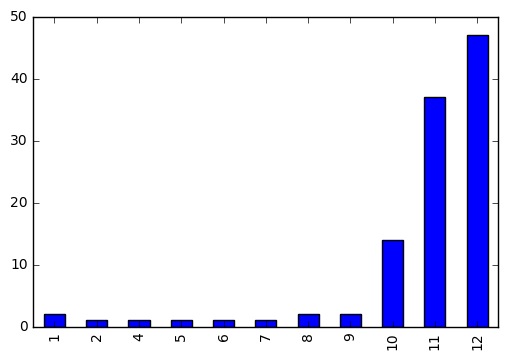

In [20]:
# Make a bar plot of the months in which movies with "Christmas" in their titles tend to be released in the USA.
r = release
r = r[r.title.str.contains("Christmas")]
r = r[r.country == "USA"]
r.date.dt.month.value_counts().sort_index().plot(kind='bar')

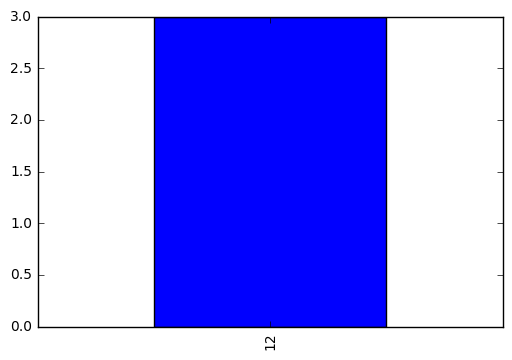

In [27]:
# Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.
r = release
r = r[(r.title.str.startswith("The Hobbit")) & (r.country == "USA")]
r.date.dt.month.value_counts().sort_index().plot(kind='bar')

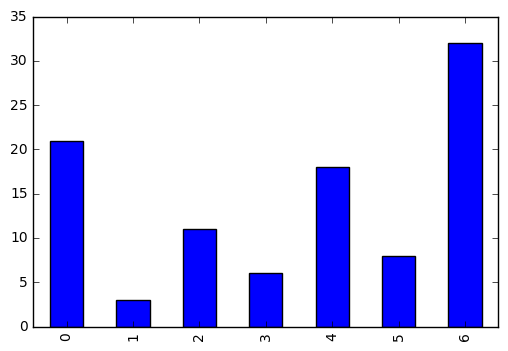

In [29]:
# Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.
r = release
r = r[(r.title.str.contains("Romance")) & (r.country == "USA")]
r.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

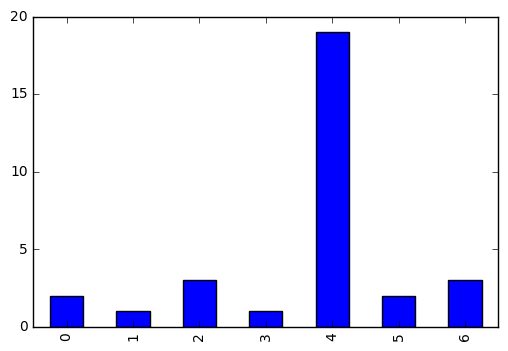

In [31]:
# Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.
r = release
r = r[(r.title.str.contains("Action")) & (r.country == "USA")]
r.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

In [34]:
# On which date was each Judi Dench movie from the 1990s released in the USA?
c = cast
c = c[c.name == "Judi Dench"]
c = c[(c.year // 10 * 10) == 1990]
r = release
r = r[r.country == "USA"]
c.merge(r).sort('date')

C:\Users\Michael Roy\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19


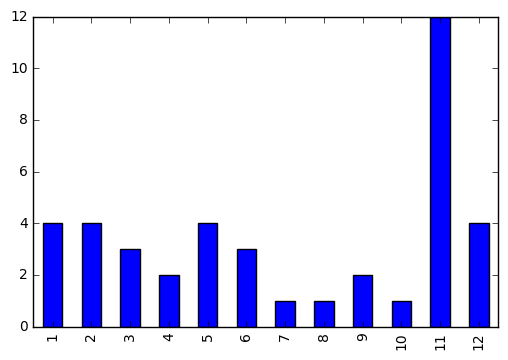

In [39]:
# In which months do films with Judi Dench tend to be released in the USA?
c = cast
c = c[c.name == "Judi Dench"]
r = release
r = r[r.country == "USA"]
r = c.merge(r)
r.date.dt.month.value_counts().sort_index().plot(kind='bar')

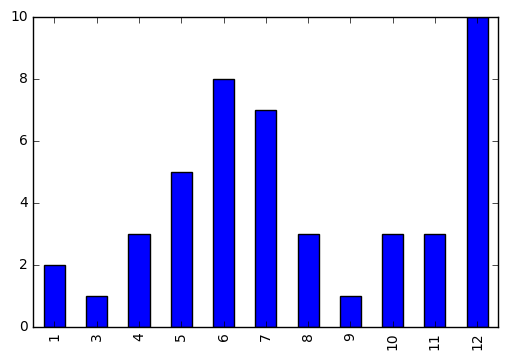

In [44]:
# In which months do films with Tom Cruise tend to be released in the USA?
c = cast
c = c[c.name == "Tom Cruise"]
r = release
r = r[r.country == "USA"]
r = c.merge(r)
r.date.dt.month.value_counts().sort_index().plot(kind='bar')